In [1]:
import nltk
import re

In [2]:
file_1 = 'V1'#new
file_2 = 'V2'#old
with open(file_1, 'r') as myfile:
    file_1 = myfile.read()
with open(file_2,'r') as myfile:
    file_2 = myfile.read()

In [3]:
file1_words = nltk.word_tokenize(file_1)
file2_words = nltk.word_tokenize(file_2)
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

In [4]:
omitedSymbols = ['{','}','(',')',';',',']
for w in omitedSymbols:
    file1_words = remove_values_from_list(file1_words,w)
    file2_words = remove_values_from_list(file2_words,w)

In [5]:
mwtokenizer = nltk.MWETokenizer(separator='')
mwtokenizer.add_mwe(('&', '&'))
mwtokenizer.add_mwe(('!','='))
mwtokenizer.add_mwe(('=','='))
mwtokenizer.add_mwe(('|','|'))
file1_words = mwtokenizer.tokenize(file1_words)
file2_words = mwtokenizer.tokenize(file2_words)

In [6]:
import pandas as pd
for w in file1_words:
    if(w not in file2_words):
        file2_words.append(w)
for w in file2_words:
    if(w not in file1_words):
        file1_words.append(w)
file1_word_set = set(sorted(file1_words))
file2_word_set = set(sorted(file2_words))

In [7]:
from nltk import FreqDist
freqDist1 = FreqDist(file1_words)
freqDist2 = FreqDist(file2_words)
import matplotlib.pyplot as plt
plt.bar(freqDist1.keys(),freqDist1.values())
plt.title("Latest Code Word frequency distribution")
plt.show()

<Figure size 640x480 with 1 Axes>

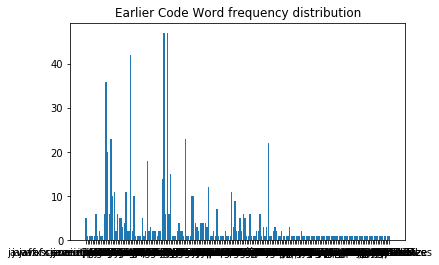

In [8]:
plt.bar(freqDist2.keys(),freqDist2.values())
plt.title("Earlier Code Word frequency distribution")
plt.show()

In [9]:
df1 = pd.DataFrame(index = sorted(file1_word_set),columns=sorted(file1_word_set))
df1.fillna(0,inplace = True)

df2 = pd.DataFrame(index = sorted(file2_word_set),columns=sorted(file2_word_set))
df2.fillna(0,inplace = True)

def updateWordCount(word,token_list,df):
    for i,w in enumerate(token_list):
        if(w == word):
            if(i == 0):
                df[w][token_list[i+1]] += 1
            elif(i == len(token_list)-1):
                df[w][token_list[i-1]] += 1
            else:
                df[w][token_list[i-1]] += 1
                df[w][token_list[i+1]] += 1
    return df
            

In [10]:
for w in file1_word_set:
    df1 = updateWordCount(w,file1_words,df1)
for w in file2_word_set:
    df2 = updateWordCount(w,file2_words,df2)

In [11]:
df1_normalized = df1.div(df1.sum(axis=1),axis = 0)
df2_normalized = df2.div(df2.sum(axis=1),axis = 0)

In [12]:
from scipy.spatial import distance
euclidDistMetrics = {}
for w in file1_word_set:
    euclidDistMetrics[w] = distance.euclidean(df1_normalized[w],df2_normalized[w])

In [13]:
import operator
topTwentyFive = sorted(euclidDistMetrics.items(),key = operator.itemgetter(1),reverse = True)

In [14]:
print("List containing changes in order")
print(topTwentyFive)

List containing changes in order
[('==', 1.4811050954280276), ('if', 1.3030102568842334), ('``', 1.1244256096601264), ('&&', 1.0702367392994923), ('j', 1.0105993798642476), ('import', 1.0), ('=', 0.9132030080513387), ('boolean', 0.8920611461216493), ('y', 0.8736312108858891), ('gridSize-1', 0.8678458053729754), ('int', 0.8097353104084853), ('e', 0.7533936824903209), ('1', 0.7511565157216644), ('y+2', 0.7498734694733631), ('||', 0.739917773869587), ('Congratulations', 0.7286042804780001), ('winPrompt.setContentText', 0.7286042804780001), ('winPrompt.showAndWait', 0.7286042804780001), ('count++', 0.7279037666342009), ('x', 0.7217335623532007), ('y-2', 0.7183488736831204), ('Alert', 0.7155742346261295), ('x+2', 0.7137881831980925), ('x-2', 0.7137881831980925), ('surrondingTiles', 0.713712354828025), ('surrondingCornerTiles', 0.7134154357322636), ("''", 0.71254196324337), ('-', 0.7109866671157249), ('j==', 0.7107884272161032), ('count', 0.7099397029234928), ('newSize', 0.7089731477778566),